In [40]:
import os
os.chdir("/home/riccardo/Desktop/Data mining")
#load dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot

#255 tcga, 40 koreani, 91 giappo
df = pd.read_csv("246W_65A.csv")
df = df.set_index(df.columns[0])

ref = pd.read_csv("TCGA_expression_log2cpm.csv")
ref = ref.iloc[:,1:]

race = {}
# asian_tcga = [45, 96, 98, 143, 156, 179, 192, 196, 241]
asian_tcga = []
# asian =1, white = 0
for i in range(len(ref.columns)):
    if ref.iloc[0,i] == "asian":
        race[ref.columns[i]] = 1
        asian_tcga.append(i)
        
    elif ref.iloc[0,i] == "white":
        race[ref.columns[i]] = 0
        
    else:
        raise(TypeError("aaaaaa"))
    
for i in range(len(df.columns)):
    if df.columns[i] not in race:
        race[df.columns[i]] = 1

#convert the dictionary into dataframe to add it as new column in dataframe in the next step
dfObj = pd.DataFrame.from_dict(race, orient='index')


# for i in race:
#     if race[i] == 1:
#         print(i)


#I added the previously obtained dataset defining if patient is asian or white as a new column to the dataframe
# to do so I needed to transpose the dataframe
df2 = df.transpose()
df2["race"] = dfObj

np.where(df2.race.values == 0)
np.where(df2.race.values == 1)

(array([246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258,
        259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271,
        272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284,
        285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297,
        298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310]),)

[5.00000000e+09 3.78231664e+09 2.86118383e+09 2.16438064e+09
 1.63727458e+09 1.23853818e+09 9.36908711e+08 7.08737081e+08
 5.36133611e+08 4.05565415e+08 3.06795364e+08 2.32079442e+08
 1.75559587e+08 1.32804389e+08 1.00461650e+08 7.59955541e+07
 5.74878498e+07 4.34874501e+07 3.28966612e+07 2.48851178e+07
 1.88246790e+07 1.42401793e+07 1.07721735e+07 8.14875417e+06
 6.16423370e+06 4.66301673e+06 3.52740116e+06 2.66834962e+06
 2.01850863e+06 1.52692775e+06 1.15506485e+06 8.73764200e+05
 6.60970574e+05 5.00000000e+05 3.78231664e+05 2.86118383e+05
 2.16438064e+05 1.63727458e+05 1.23853818e+05 9.36908711e+04
 7.08737081e+04 5.36133611e+04 4.05565415e+04 3.06795364e+04
 2.32079442e+04 1.75559587e+04 1.32804389e+04 1.00461650e+04
 7.59955541e+03 5.74878498e+03 4.34874501e+03 3.28966612e+03
 2.48851178e+03 1.88246790e+03 1.42401793e+03 1.07721735e+03
 8.14875417e+02 6.16423370e+02 4.66301673e+02 3.52740116e+02
 2.66834962e+02 2.01850863e+02 1.52692775e+02 1.15506485e+02
 8.73764200e+01 6.609705

Text(0, 0.5, 'weights')

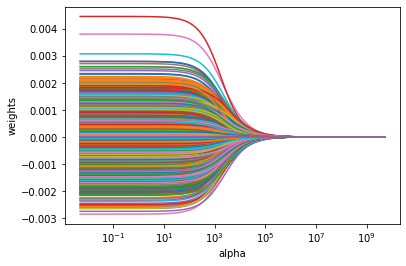

In [41]:
#Ridge regression (da rivedere)
from sklearn.model_selection import train_test_split

# Get train and test set (70/30)
x=df2[df2.columns[0:len(df2.columns)-1]]  # x è un dataset che comprende tutti i geni e i loro valori numerici
# quindi non comprende la colonna ["race"]

#y è un dataset composto solo dalla colonna ["race"]
y=df2[df2.columns[-1]]  # Labels, same as taking df3["race"]

#Funzione figa che splitta in automatico il dataset date le features (race in questo caso)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3) # 70% training and 30% test


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


alphas = 10**np.linspace(10,-2,100)*0.5
ridge = Ridge(normalize = False)
coefs = []
print(alphas)
for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_test, y_test)
    coefs.append(ridge.coef_)
    pred = ridge.predict(X_test)            # Use this model to predict the test data
    print("alpha = ", a, "gives",mean_squared_error(y_test, pred))
    
    
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')



In [9]:
#Random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

def rndFor(df2):
    x=df2[df2.columns[0:len(df2.columns)-1]] 
    y=df2[df2.columns[-1]]
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3) 
    
    #X_train = x.iloc[:,0:336]
    #y_train = y[0:336]
    
    #X_test = x.iloc[:, 336:len(x.columns)-1]
    #y_test = y[336:len(y)-1]
    
    clf=RandomForestClassifier(n_estimators=500,bootstrap=True, oob_score = True, max_depth = 50)
    #scores = cross_val_score(clf, x, y, cv=5)
    #print(scores)

    clf.fit(X_train,y_train)

    # Predict features of test set
    y_pred=clf.predict(X_test)

    print(np.unique(y_pred,return_counts=True)) # 0 = white, 1 = asian
    print("Accuracy: ", clf.score(X_test, y_test)," oob_score" , clf.oob_score_)

    return clf
    


In [11]:
c = 0
genes_dic = {} #weight associated by random forest
genes_counts = {} #counts how many times a gene appears

while c < 5: 
    print("inizio il giro \n")
    clf = rndFor(df2)
    a = list(clf.feature_importances_)
    df["importance"] = a
    values = df[df["importance"] != 0] #values è il dataframe ridotto ai soli geni significativi
    
    scores = cross_val_score(clf, x, y, cv=6)
    print(scores)
    
    for i in values.index:
        if i not in genes_dic:
            genes_dic[i] = [values.loc[i].importance]
            genes_counts[i] = 1
        
        else:
            genes_dic[i].append([values.loc[i].importance])
            genes_counts[i] += 1
    
#     if c == 0:
#         genes = values.index
#     else:
#         genes = genes[np.in1d(genes, values.index)] #tiene solo valori comuni tra le iterazioni
    
    c+=1
    print("")

    
#genes.shape #tiene sempre intorno ai 150 geni con 5 iterazioni, 60 geni a 10 iterazioni
#df_final = df.loc[genes]

df_fin = df.loc[genes_counts.keys()]
df_fin["counts"] = [j for i,j in genes_counts.items()]

#df_fin.to_csv("Important_genes_only.csv")

inizio il giro 

(array([0, 1]), array([73, 43]))
Accuracy:  0.9913793103448276  oob_score 0.9702602230483272
[0.86153846 1.         1.         1.         1.         1.        ]

inizio il giro 

(array([0, 1]), array([79, 37]))
Accuracy:  0.9741379310344828  oob_score 0.9776951672862454
[0.86153846 1.         1.         1.         1.         1.        ]

inizio il giro 

(array([0, 1]), array([70, 46]))
Accuracy:  0.9827586206896551  oob_score 0.9739776951672863
[0.86153846 1.         1.         1.         1.         1.        ]

inizio il giro 

(array([0, 1]), array([81, 35]))
Accuracy:  0.9827586206896551  oob_score 0.9739776951672863
[0.86153846 1.         1.         1.         1.         1.        ]

inizio il giro 

(array([0, 1]), array([79, 37]))
Accuracy:  0.9741379310344828  oob_score 0.9776951672862454
[0.86153846 1.         1.         1.         1.         1.        ]



In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


x=df2[df2.columns[0:len(df2.columns)-1]] 
y=df2[df2.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3) 

clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')

#scores = cross_val_score(clf, x, y, cv=6)
#print(scores)

clf.fit(X_train,y_train)

# Predict features of test set
y_pred=clf.predict(X_test)

print(np.unique(y_pred,return_counts=True)) # 0 = white, 1 = asian
print("Accuracy: ", clf.score(X_test, y_test))



(array([0, 1]), array([46, 70]))
Accuracy:  0.08620689655172414


/home/riccardo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [ ]:
x=df2[df2.columns[0:len(df2.columns)-1]] 
y=df2[df2.columns[-1]]
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3) 
X_train = x.iloc[np.r_[0:250, 370:len(x.index)],:]  #da 91 a 335 son bianchi, 0:90 e 336:400 asiatici 
y_train = y[np.r_[0:250, 370:len(x.index)]]

print(len(y_train), len(X_train))
X_test = x.iloc[np.r_[250:370],:] #len(x.columns)
y_test = y[np.r_[250:370]]
    
clf=RandomForestClassifier(n_estimators=400,bootstrap=True, oob_score = True)
    #scores = cross_val_score(clf, x, y, cv=5)
    #print(scores)

clf.fit(X_train,y_train)

# Predict features of test set
y_pred=clf.predict(X_test)

y_pred

print(np.unique(y_pred,return_counts=True)) # 0 = white, 1 = asian
print("Accuracy: ", clf.score(X_test, y_test)," oob_score" , clf.oob_score_)
y_pred

281 281
